In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

import os
import glob

bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [3]:
## This one didn't have images as 224x224
# path_img = 'C:/Users/572784/Documents/Personal/Sports Analytics/play_tracking_cv/play_images/'
#     Results: 
#     epoch | error_rate
#     0     | 0.319672
#     1     | 0.278689
#     2     | 0.237705
#     3     | 0.245902


## This one had images that were all 224x224
# path_img = 'C:/Users/572784/Documents/Personal/Sports Analytics/play_tracking_cv/play_images_s224/'
#     epoch | error_rate
#     0     | 0.213115
#     1     | 0.180328
#     2     | 0.188525
#     3     | 0.196721

## This one was just the ball track, and its width was set to 3
#path_img = 'C:/Users/572784/Documents/Personal/Sports Analytics/play_tracking_cv/play_images_ballonly/'
#   epoch | error_rate
#   0     | 0.229508
#   1     | 0.286885
#   2     | 0.196721
#   3     | 0.204918

## This one was just the ball track, but with a colormap to show the velocity, using bokeh's Turbo256
path_img = 'C:/Users/572784/Documents/Personal/Sports Analytics/play_tracking_cv/play_images_ballspeed/'
#   epoch | error_rate
#   0     | 0.098361
#   1     | 0.057377
#   2     | 0.098361
#   3     | 0.057377

In [4]:
fnames = get_image_files(path_img)
pat = r'/([^/]+)_\d+.png$'
#print (fnames[:5])

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

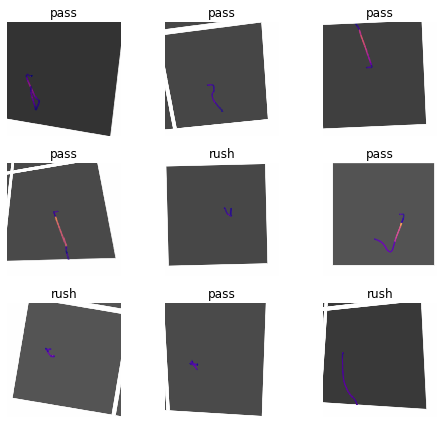

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
print(data.classes)
len(data.classes),data.c

['pass', 'rush']


(2, 2)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.822119,0.254084,0.098361,06:33
1,0.759862,0.153122,0.057377,05:18
2,0.644737,0.183342,0.098361,05:13
3,0.521968,0.158582,0.057377,05:30


In [9]:
learn.save('stage-1-224-ballspeed')

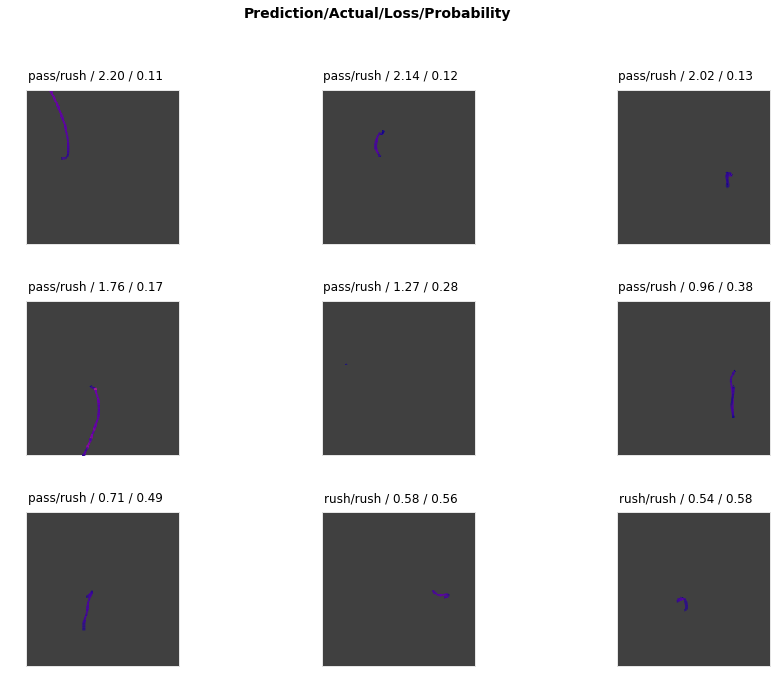

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,11))

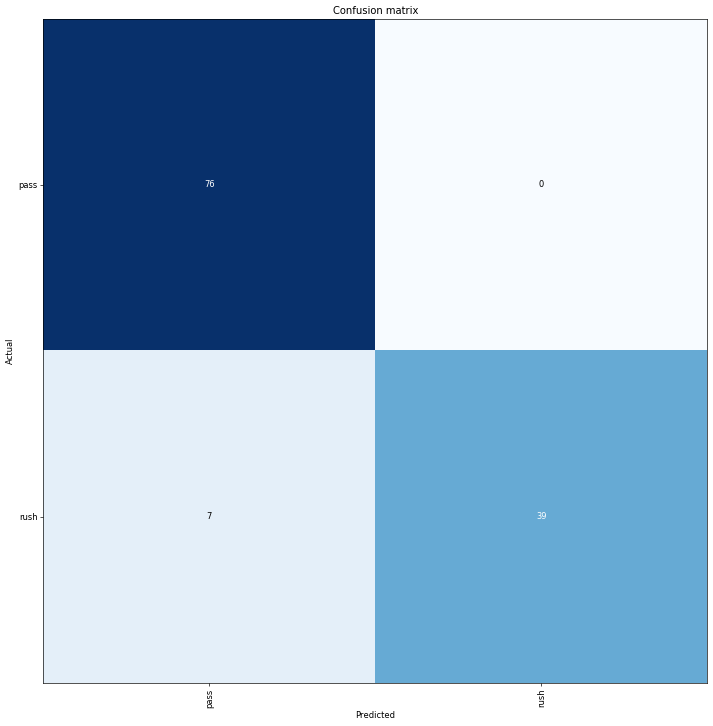

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)